In [1]:
%matplotlib inline

# DataQuest - Project 6

## Analyzing Employee Exit Surveys

## Introduction

In this Dataquest Project, the 4th in Step 2: Data Analysis and Visualization, data will be analyzed from the exit surveys collected by the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute located in Queensland, Australia.

The primary goal of this analysis is to determine: "Are employees who only worked for the institues for a short period of time resigning due to some kind of dissatisfaction? What about emplyees who have been there longer?"

First I will import the necessary packages : Numpy and Pandas, followed by the two data sets. Then I'll briefly explore the data sets to look for missing values and general information.



In [2]:
## Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data Sets
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
## Explore DETE Survey
pd.options.display.max_columns = 150 # to avoid truncated output 
print(dete_survey.info())
print(dete_survey.head())
print(dete_survey.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
## TAFE Survey
## Explore DETE Survey

print(tafe_survey.info())
print(tafe_survey.head())
print(tafe_survey.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

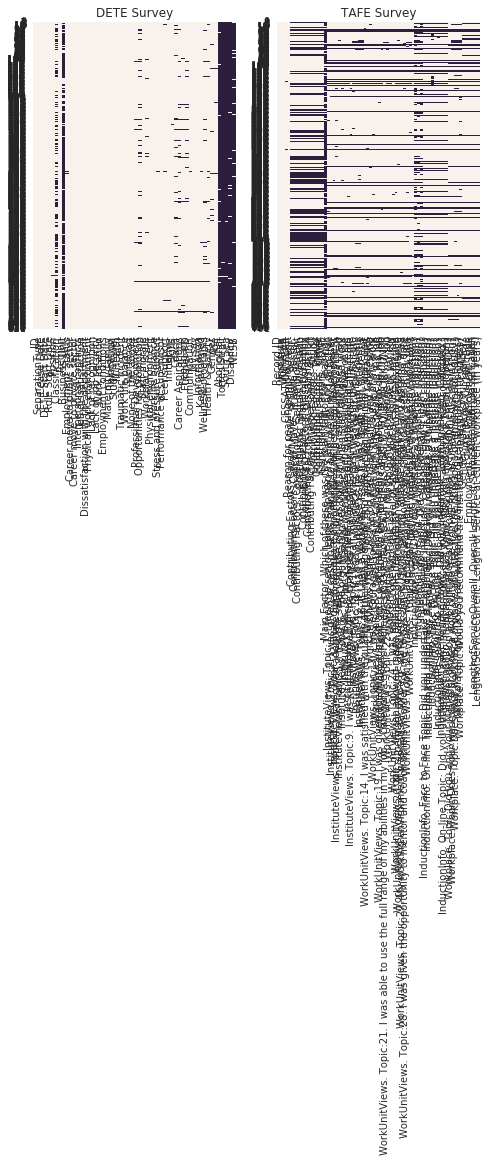

In [5]:
## Show Heat Maps

plt.figure(figsize=(9,8))
f,(ax1,ax2) = plt.subplots(1,2)
#fig, (ax1, ax2) = plt.subplots(1, 3)

gx1 = sns.heatmap(dete_survey.isnull(), cbar=False, ax=ax1)
gx1.set_title("DETE Survey")
gx2 = sns.heatmap(tafe_survey.isnull(), cbar=False, ax=ax2)
gx2.set_title("TAFE Survey")
plt.show()

We can see from the above analysis that there are many missing missing items in both the surverys, and that the TAFE Survey had more specific questions.

## Data Cleaning

There is a lot of information included in the data sets that isn't needed, and there is also the issue that some of the information that should be recognized as "NaN" is written as "Not Stated". Now I'll address these two issues.

To remove the unecessary data, the columns 28 to 49 will be removed in the DETE survey, and columns 17 to 65 will be removed in the TAFE survey. Within the pd.read_csv function, the 'na_values' can be set to to "Not Stated" to catch these and convert to "NaN"

In [6]:
## Read in files with "Not Stated" as "NaN" for DETE
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

## Drop columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [7]:
## Read in files with "Not Stated" as "NaN" for TAFE
tafe_survey = pd.read_csv("tafe_survey.csv", na_values="Not Stated")

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Now, I'll address the issues with in the naming of the columns. There are columns in both surveys that have the same meaning, yet have different names. For example, there is "SeperationType" and "Reason for ceasing employment", which both contain the reason for why the employment ended.

In [8]:
# Make adjustments to DETE Survey
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

#Check outcome
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
#Update TAFE Survey columns
rename = {'Record ID': 'id',
          'CESSATION YEAR': 'cease_date',
          'Reason for ceasing employment': 'separationtype',
          'Gender. What is your Gender?': 'gender',
          'CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status',
          'Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'    
                    
}



tafe_survey_updated = tafe_survey_updated.rename(rename, axis=1)

#Check TAFE Columns
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [10]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Analysis

The goal of this project again is to determine if employees are resigning because of some kind of dissatisfaction, and if this applies to people who have worked for a short period of time, a long period of time, or both.

To answer these questions, we can examine the column detailing the type of seperation, and query for results that contain "resignation".

Below I'll review the possible listings under seperation type , and do a selection for "resignation".

In [12]:
## Review DETE Survey

dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
## Review TAFE Survey

tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [14]:
## Selection all resignation options in DETE Survey
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split("-").str[0]
dete_resignations = dete_survey_updated["separationtype"].str.contains("Resignation").copy()
dete_resignations = dete_survey_updated.loc[dete_resignations].copy()


In [15]:
## Selection of all resignations in TAFE Survey
tafe_resignations = tafe_survey_updated["separationtype"].str.contains("Resignation", na=False).copy()
tafe_resignations = tafe_survey_updated.loc[tafe_resignations].copy()

### Checking Data

Before we continue on with the Analysis, now that the data has been filtered, it's a good idea to confirm that the data isn't corrupted.  To do this, I'm going to check the cease_data and dete_start_date to confirm that in all cases the start data occurs before the cease_data, and that no start dates happen much earlier than the year 1940.

In [16]:
## Checking cease_date in DETE
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [17]:
## Select year for DETE survey
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype("float")

dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [18]:
## View Starte date in DETE survey

dete_resignations["dete_start_date"].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [19]:
## Exame TAFE survey
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

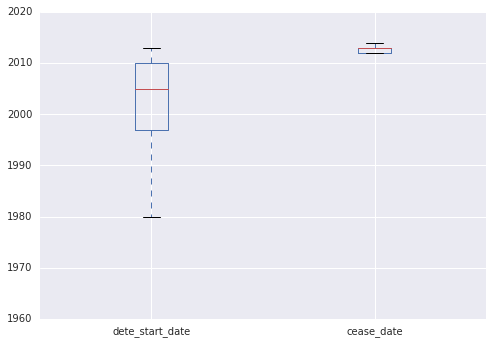

In [20]:
## We can quickly check all the values visually with a boxplot
## to identify anything unusual

## Plot DETE start Times

boxplot = dete_resignations.boxplot(column=["dete_start_date", "cease_date"])

The above checking reveals that there aren't any big issues with the years.

The next step in this analysis will be to determine the amount of time an employee who took the DETE worked by doing a calculation on their end and start date. With this information, a new column can be created in the data frame which will be the same as the "institute_service" column in the TAFE data frame. The data frames can than be combined along this column for further analysis.

In [21]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

dete_resignations["institute_service"].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

Now I'll rexamine the columns we have in both the TAFE and DETE survey in order to indentify information which would indicate job dissatisfaction.

In the TAFE survey I will end up choosing:

1. 'Contributing Factors. Dissatisfaction'
2. 'Contributing Factors. Job Dissatisfaction'
3. 'Contributing Factors. Interpersonal Conflict'

The first two explicitly contain Dissatisfaction, and interpersonal conflict is related to issues at work due to the negative actions of other personnel.

In [22]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Checking the DETE survey the following factors will be considered for disatisfaction:

1. 'interpersonal_conflicts'
2. 'job_dissatisfaction'
3. 'dissatisfaction_with_the_department'
4. 'physical_work_environment'
5. 'lack_of_recognition'
6. 'lack_of_job_security'
7. 'work_location'
8. 'employment_conditions'
9. 'work_life_balance'
10. 'workload'

In [23]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [24]:
## Examine possible values for TAFE
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts())

print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts())

print(tafe_resignations["Contributing Factors. Interpersonal Conflict"].value_counts())


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64
-                         308
Interpersonal Conflict     24
Name: Contributing Factors. Interpersonal Conflict, dtype: int64


In [25]:
#Create function to check possible values, assign True/False/NaN

def checker(col):
    if col == "-":
        return False
    elif pd.isnull(col):
        return np.nan
    else:
        return True
        

In [26]:
#Run through TAFE survey
tafe_resignations["disatisfaction"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction", "Contributing Factors. Interpersonal Conflict"]].applymap(checker).any(1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up["disatisfaction"].value_counts()

False    235
True      97
Name: disatisfaction, dtype: int64

In [27]:
dete_resignations["disatisfaction"] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()

### Data Aggregation

Now it's time to combine the two data files together, and we'll do this on the "institute_service" column


In [28]:
## Place identifier for each item in each survey
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)


In [29]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [30]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [31]:
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [32]:
## Convert yeas to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [33]:
## Final Analysis

combined_updated["disatisfaction"].value_counts(dropna=False)


False    397
True     246
NaN        8
Name: disatisfaction, dtype: int64

In [34]:
combined_updated["disatisfaction"] = combined_updated["disatisfaction"].fillna(False)
combined_updated["disatisfaction"].value_counts()


False    405
True     246
Name: disatisfaction, dtype: int64

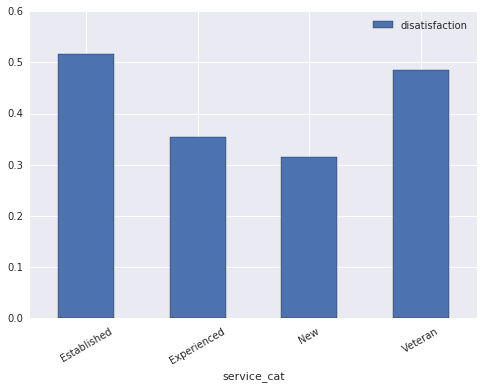

In [35]:
dis_pct = combined_updated.pivot_table(index='service_cat', values="disatisfaction", aggfunc=np.mean)

# Plot the results
dis_pct.plot(kind='bar', rot=30)